# Final Project 4

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

/Users/benitaho/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#read in dog data from source 

df = pd.read_csv("dogs_final_csv.csv")

print df.head()
print df.count()

                Shelter_Name    Year Shelter_Type  Community_Name  \
0  A New Leash on Life, Inc.  2008.0           AG  Madison County   
1  A New Leash on Life, Inc.  2009.0           AG  Madison County   
2  A New Leash on Life, Inc.  2010.0           AG  Madison County   
3  A New Leash on Life, Inc.  2011.0           AG  Madison County   
4  A New Leash on Life, Inc.  2012.0           AG  Madison County   

  Community_State Community_Region  Community_Population  \
0              AL            South              319510.0   
1              AL            South              327744.0   
2              AL            South              335988.0   
3              AL            South              340111.0   
4              AL            South              343080.0   

   Community_Median_Income  Beginning_Shelter_Count  \
0                  55096.0                     46.0   
1                  57617.0                     54.0   
2                  53539.0                     55.0   
3   

In [3]:
#taking out where Total Intake is zero

df["Total_Intake"].replace(0,np.nan, inplace = True)

df = df.dropna(subset=["Total_Intake"])

df.count()

Shelter_Name                                                                    1392
Year                                                                            1392
Shelter_Type                                                                    1392
Community_Name                                                                  1392
Community_State                                                                 1392
Community_Region                                                                1392
Community_Population                                                            1392
Community_Median_Income                                                         1392
Beginning_Shelter_Count                                                         1392
Subtotal_Intake_from_Public                                                     1392
Subtotal_from_Incoming_Transfers_from_Organizations_within_Community            1392
Subtotal_Intake_from_Incoming_Transfers_from_Organizations_outsid

In [4]:
#create adoption rate

df["Adoption_Rate"] = df["Total_Adoptions"]/df["Total_Outcomes"]

In [5]:
#create euthanized rate

df["Euth_Rate"] = df["Total_Euth"]/df["Total_Outcomes"]

In [6]:
#create Health Status case mix
#sum all Health Statuses, take out where Total Intake Health is zero, create ratio

df["Total_Health_Intake"] = df["Sum_Intake_Healthy"] + df["Sum_Intake_TR"] + df["Sum_Intake_TM"] + df["Sum_Intake_UU"]

df["Total_Health_Intake"].replace(0,np.nan, inplace = True)

df = df.dropna(subset=["Total_Health_Intake"])

df["Percent_Healthy"] = df["Sum_Intake_Healthy"]/df["Total_Health_Intake"]
df.count()

Shelter_Name                                                                    1350
Year                                                                            1350
Shelter_Type                                                                    1350
Community_Name                                                                  1350
Community_State                                                                 1350
Community_Region                                                                1350
Community_Population                                                            1350
Community_Median_Income                                                         1350
Beginning_Shelter_Count                                                         1350
Subtotal_Intake_from_Public                                                     1350
Subtotal_from_Incoming_Transfers_from_Organizations_within_Community            1350
Subtotal_Intake_from_Incoming_Transfers_from_Organizations_outsid

In [7]:
df.isnull().sum()

Shelter_Name                                                                    0
Year                                                                            0
Shelter_Type                                                                    0
Community_Name                                                                  0
Community_State                                                                 0
Community_Region                                                                0
Community_Population                                                            0
Community_Median_Income                                                         0
Beginning_Shelter_Count                                                         0
Subtotal_Intake_from_Public                                                     0
Subtotal_from_Incoming_Transfers_from_Organizations_within_Community            0
Subtotal_Intake_from_Incoming_Transfers_from_Organizations_outside_Community    0
Subtotal_Intake_

In [8]:
df.describe()

,Year,Community_Population,Community_Median_Income,Beginning_Shelter_Count,Subtotal_Intake_from_Public,Subtotal_from_Incoming_Transfers_from_Organizations_within_Community,Subtotal_Intake_from_Incoming_Transfers_from_Organizations_outside_Community,Subtotal_Intake_from_Owners_Guardians_Requesting_Euthanasia,Total_Intake,Total_Adoptions,TOTAL_OUTGOING_TRANSFERS_to _Organizations_within_Community,TOTAL_OUTGOING_TRANSFERS_to _Organizations_Outside_Community,Other_Return_to_Owner_Habitat_Died_Lost,Total_Euth,Total_Outcomes,Sum_Intake_Healthy,Sum_Intake_TR,Sum_Intake_TM,Sum_Intake_UU,Sum_Outgoing_Healthy,Sum_Outgoing_TR,Sum_Outgoing_TM,Sum_Outgoing_UU,Adoption_Rate,Euth_Rate,Total_Health_Intake,Percent_Healthy
count,1350.000000,1.350000e+03,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,2010.780741,1.112929e+06,56356.405185,75.902222,1659.424444,151.845926,117.115556,90.808889,2019.227407,774.214815,145.580000,129.200741,333.877037,629.865185,2012.737778,1159.682963,319.787407,165.271111,359.262222,825.591852,283.748889,161.120000,402.057778,0.631982,0.130184,2004.003704,0.647918
std,1.992778,1.207722e+06,14045.482473,154.971829,4283.570543,447.026050,382.595709,364.442443,4522.510388,1488.209138,488.424124,432.561502,938.137914,2017.569828,4506.399721,2454.362261,888.888727,595.786960,1386.118583,1711.399039,738.667386,559.875745,1342.739688,0.341037,0.175796,4522.049795,0.264500
min,2008.000000,2.474100e+04,34119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2009.000000,2.897148e+05,45383.000000,10.000000,44.000000,0.000000,0.000000,0.000000,143.250000,84.250000,0.000000,0.000000,1.000000,1.000000,142.250000,72.250000,7.000000,1.000000,0.000000,70.000000,4.000000,0.000000,2.000000,0.290144,0.006102,141.000000,0.483891
50%,2011.000000,8.128260e+05,53539.000000,33.000000,284.000000,11.000000,1.000000,0.000000,439.000000,259.000000,1.000000,2.000000,20.000000,12.000000,440.500000,272.500000,58.000000,11.000000,9.000000,227.000000,41.000000,10.000000,16.000000,0.743328,0.038513,433.500000,0.696277
75%,2012.000000,1.529875e+06,67518.000000,79.000000,1504.000000,102.750000,50.000000,13.750000,2066.500000,759.250000,61.000000,64.500000,300.750000,397.750000,2074.250000,1273.750000,295.000000,92.000000,175.750000,820.500000,238.000000,90.000000,240.000000,0.958727,0.211024,2034.750000,0.859536
max,2014.000000,8.491079e+06,97532.000000,2109.000000,43920.000000,5440.000000,5090.000000,6746.000000,43927.000000,12995.000000,6181.000000,5400.000000,15206.000000,22499.000000,43927.000000,30617.000000,11723.000000,7787.000000,17307.000000,17724.000000,11027.000000,7609.000000,16144.000000,1.000000,0.830189,43927.000000,1.000000


In [9]:
df.mean()

Year                                                                            2.010781e+03
Community_Population                                                            1.112929e+06
Community_Median_Income                                                         5.635641e+04
Beginning_Shelter_Count                                                         7.590222e+01
Subtotal_Intake_from_Public                                                     1.659424e+03
Subtotal_from_Incoming_Transfers_from_Organizations_within_Community            1.518459e+02
Subtotal_Intake_from_Incoming_Transfers_from_Organizations_outside_Community    1.171156e+02
Subtotal_Intake_from_Owners_Guardians_Requesting_Euthanasia                     9.080889e+01
Total_Intake                                                                    2.019227e+03
Total_Adoptions                                                                 7.742148e+02
TOTAL_OUTGOING_TRANSFERS_to _Organizations_within_Community           

In [10]:
df.std()

Year                                                                            1.992778e+00
Community_Population                                                            1.207722e+06
Community_Median_Income                                                         1.404548e+04
Beginning_Shelter_Count                                                         1.549718e+02
Subtotal_Intake_from_Public                                                     4.283571e+03
Subtotal_from_Incoming_Transfers_from_Organizations_within_Community            4.470260e+02
Subtotal_Intake_from_Incoming_Transfers_from_Organizations_outside_Community    3.825957e+02
Subtotal_Intake_from_Owners_Guardians_Requesting_Euthanasia                     3.644424e+02
Total_Intake                                                                    4.522510e+03
Total_Adoptions                                                                 1.488209e+03
TOTAL_OUTGOING_TRANSFERS_to _Organizations_within_Community           

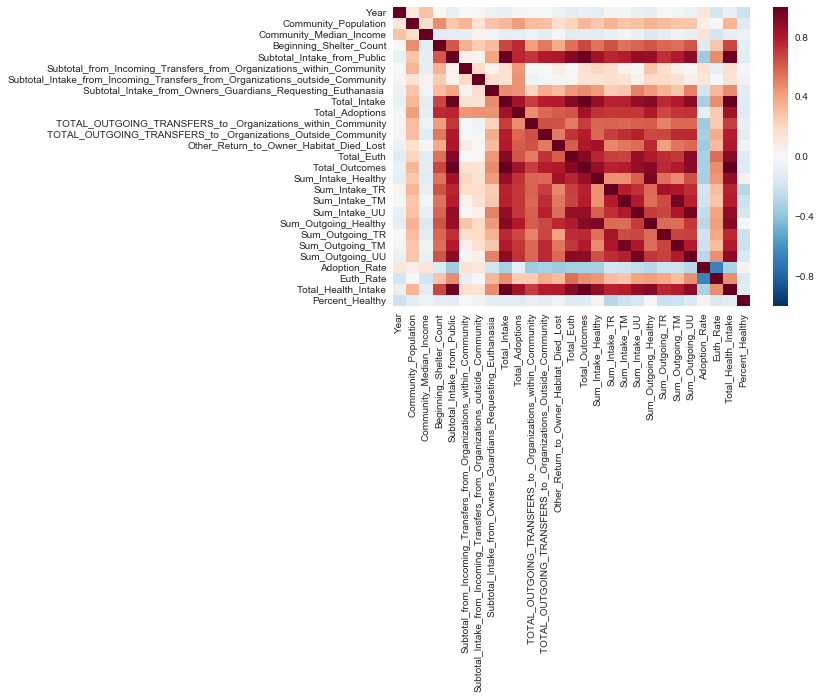

In [11]:
x = df.corr()
sns.heatmap(x)

In [12]:
#create dummy variables for Community Region

dummy = pd.get_dummies(df['Community_Region'], prefix='comm_reg')
print dummy.head()

   comm_reg_Midwest  comm_reg_Northeast  comm_reg_South  comm_reg_West
0                 0                   0               1              0
1                 0                   0               1              0
2                 0                   0               1              0
3                 0                   0               1              0
4                 0                   0               1              0


In [13]:
#create dummy variables for Shelter Type

dummy2 = pd.get_dummies(df['Shelter_Type'], prefix='shelter')
print dummy2.head()

   shelter_AC  shelter_AG  shelter_TS
0           0           1           0
1           0           1           0
2           0           1           0
3           0           1           0
4           0           1           0


In [14]:
#new data frame

df_d = df[['Community_Population', 'Community_Median_Income', 'Percent_Healthy',
              'Adoption_Rate', 'Euth_Rate']]

df_d = df_d.join(dummy.iloc[:, 1: ])

df_d = df_d.join(dummy2.iloc[:, 1: ])
                 
df_d.head()

,Community_Population,Community_Median_Income,Percent_Healthy,Adoption_Rate,Euth_Rate,comm_reg_Northeast,comm_reg_South,comm_reg_West,shelter_AG,shelter_TS
0,319510.0,55096.0,0.722846,0.988506,0.011494,0,1,0,1,0
1,327744.0,57617.0,0.840304,0.992366,0.007634,0,1,0,1,0
2,335988.0,53539.0,0.739316,0.970464,0.004219,0,1,0,1,0
3,340111.0,54444.0,0.863333,0.935374,0.017007,0,1,0,1,0
4,343080.0,56839.0,0.869732,0.992780,0.003610,0,1,0,1,0


In [15]:
#new data frame no AG

df_noag = df[['Community_Population', 'Community_Median_Income', 'Percent_Healthy',
              'Adoption_Rate', 'Euth_Rate']]

df_noag = df_noag.join(dummy.iloc[:, 1: ])

df_noag = df_noag.join(dummy2.iloc[:, 0])
df_noag = df_noag.join(dummy2.iloc[:, 2])
                 
df_noag.head()

,Community_Population,Community_Median_Income,Percent_Healthy,Adoption_Rate,Euth_Rate,comm_reg_Northeast,comm_reg_South,comm_reg_West,shelter_AC,shelter_TS
0,319510.0,55096.0,0.722846,0.988506,0.011494,0,1,0,0,0
1,327744.0,57617.0,0.840304,0.992366,0.007634,0,1,0,0,0
2,335988.0,53539.0,0.739316,0.970464,0.004219,0,1,0,0,0
3,340111.0,54444.0,0.863333,0.935374,0.017007,0,1,0,0,0
4,343080.0,56839.0,0.869732,0.992780,0.003610,0,1,0,0,0


In [16]:
df_d.describe()

,Community_Population,Community_Median_Income,Percent_Healthy,Adoption_Rate,Euth_Rate,comm_reg_Northeast,comm_reg_South,comm_reg_West,shelter_AG,shelter_TS
count,1.350000e+03,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.112929e+06,56356.405185,0.647918,0.631982,0.130184,0.061481,0.298519,0.513333,0.551852,0.068889
std,1.207722e+06,14045.482473,0.264500,0.341037,0.175796,0.240300,0.457778,0.500007,0.497488,0.253359
min,2.474100e+04,34119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.897148e+05,45383.000000,0.483891,0.290144,0.006102,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.128260e+05,53539.000000,0.696277,0.743328,0.038513,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.529875e+06,67518.000000,0.859536,0.958727,0.211024,0.000000,1.000000,1.000000,1.000000,0.000000
max,8.491079e+06,97532.000000,1.000000,1.000000,0.830189,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df_d.corr()

,Community_Population,Community_Median_Income,Percent_Healthy,Adoption_Rate,Euth_Rate,comm_reg_Northeast,comm_reg_South,comm_reg_West,shelter_AG,shelter_TS
Community_Population,1.000000,0.174713,-0.124732,0.072401,0.004707,0.187169,-0.247373,0.200172,0.048144,0.062646
Community_Median_Income,0.174713,1.000000,-0.054493,0.136162,-0.184213,-0.123244,-0.438850,0.605790,0.107564,-0.090440
Percent_Healthy,-0.124732,-0.054493,1.000000,0.030642,-0.142678,-0.036082,-0.121306,0.055087,0.039532,-0.035190
Adoption_Rate,0.072401,0.136162,0.030642,1.000000,-0.670599,0.021292,-0.108576,0.083478,0.841710,-0.083272
Euth_Rate,0.004707,-0.184213,-0.142678,-0.670599,1.000000,0.013885,0.212102,-0.216861,-0.648556,0.209457
comm_reg_Northeast,0.187169,-0.123244,-0.036082,0.021292,0.013885,1.000000,-0.166966,-0.262866,-0.085595,0.149546
comm_reg_South,-0.247373,-0.438850,-0.121306,-0.108576,0.212102,-0.166966,1.000000,-0.669979,-0.098940,-0.056003
comm_reg_West,0.200172,0.605790,0.055087,0.083478,-0.216861,-0.262866,-0.669979,1.000000,0.082151,-0.039440
shelter_AG,0.048144,0.107564,0.039532,0.841710,-0.648556,-0.085595,-0.098940,0.082151,1.000000,-0.301838
shelter_TS,0.062646,-0.090440,-0.035190,-0.083272,0.209457,0.149546,-0.056003,-0.039440,-0.301838,1.000000


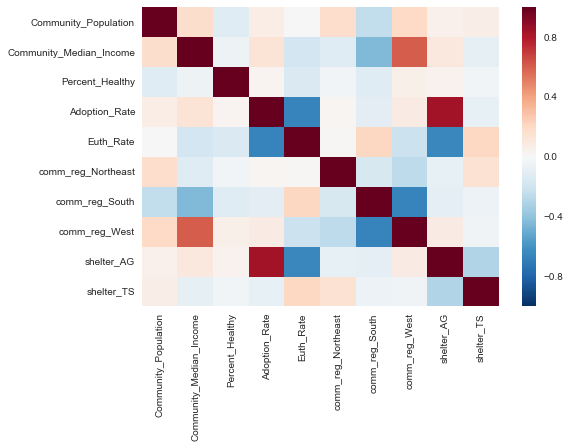

In [18]:
c = df_d.corr()
sns.heatmap(c)

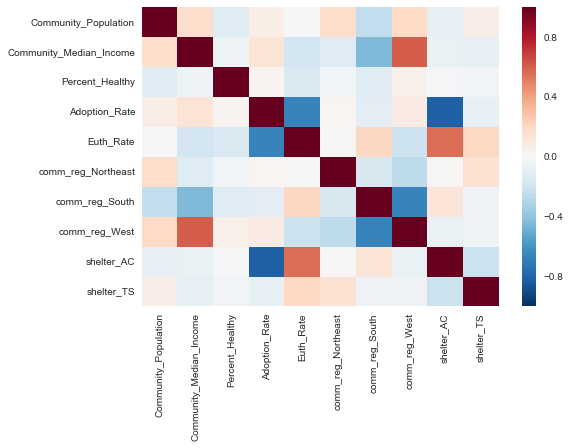

In [19]:
c = df_noag.corr()
sns.heatmap(c)

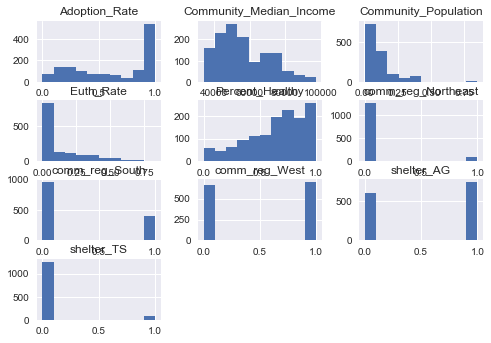

In [20]:
#plot the distribution of each variable
df_d.hist()
pl.show()

0.743328468326


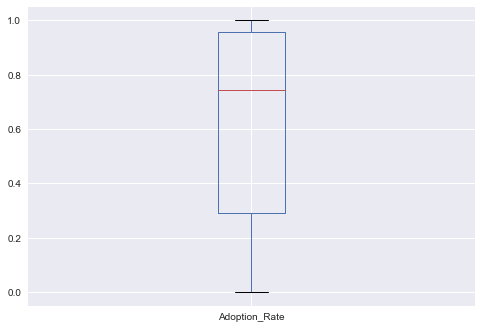

In [25]:
#create box plot for Adoption Rate
df_d['Adoption_Rate'].plot(kind='box')

print df_d['Adoption_Rate'].median()

0.0385126841244


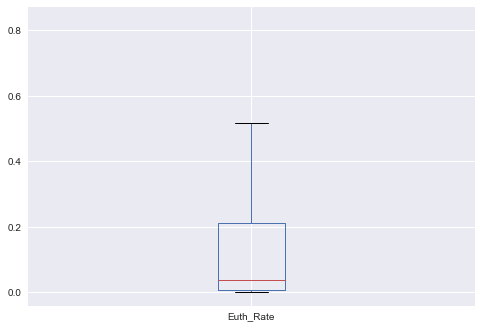

In [21]:
#create box plot for Euthanized Rate
df_d['Euth_Rate'].plot(kind='box')

print df_d['Euth_Rate'].median()

## EDA Summary

Not too many strong correlations found within the data.  We will proceed with building a model looking at the factors: Shelter Type, Region, Population of the Community, Median Income of the Community, and the percentage of Healthy dogs within a shelter.

### Building the Model

In [21]:
#from sklearn import linear_model

X = df_d[['Percent_Healthy']]
y = df_d['Adoption_Rate']

model = linear_model.LinearRegression()
results = model.fit(X, y)

print results.intercept_, results.coef_

0.606383419225 [ 0.03950882]


In [22]:
#using statsmodels.api as sm
#regression with health

X = df_d[['Percent_Healthy']]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption_Rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.267
Date:                Sat, 08 Jul 2017   Prob (F-statistic):              0.261
Time:                        02:06:05   Log-Likelihood:                -462.15
No. Observations:                1350   AIC:                             928.3
Df Residuals:                    1348   BIC:                             938.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6064      0.025     

In [144]:
#multilinear regression without dummy variables

X = df_d[['Percent_Healthy', 'Community_Population', 'Community_Median_Income']]
X = sm.add_constant(X)
y = df_d['Adoption_Rate']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption_Rate   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     10.53
Date:                Tue, 04 Jul 2017   Prob (F-statistic):           7.58e-07
Time:                        22:34:24   Log-Likelihood:                -447.13
No. Observations:                1350   AIC:                             902.3
Df Residuals:                    1346   BIC:                             923.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [145]:
#multilinear regression with all dummy variables added

X = df_d[['Percent_Healthy', 'Community_Population', 'Community_Median_Income', 
          'comm_reg_Northeast', 'comm_reg_South', 'comm_reg_West', 
          'shelter_AG', 'shelter_TS']]
X = sm.add_constant(X)
y = df_d['Adoption_Rate']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption_Rate   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     509.3
Date:                Tue, 04 Jul 2017   Prob (F-statistic):               0.00
Time:                        22:34:27   Log-Likelihood:                 479.41
No. Observations:                1350   AIC:                            -940.8
Df Residuals:                    1341   BIC:                            -893.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [146]:
#multilinear regression with region types

X = df_d[['Percent_Healthy', 'Community_Population', 'Community_Median_Income',
         'comm_reg_Northeast', 'comm_reg_South', 'comm_reg_West']]
X = sm.add_constant(X)
y = df_d['Adoption_Rate']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption_Rate   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5.922
Date:                Tue, 04 Jul 2017   Prob (F-statistic):           4.08e-06
Time:                        22:34:37   Log-Likelihood:                -445.16
No. Observations:                1350   AIC:                             904.3
Df Residuals:                    1343   BIC:                             940.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [26]:
#multilinear regression with shelter types

X = df_d[['Percent_Healthy', 'Community_Population', 'Community_Median_Income',
         'shelter_AG', 'shelter_TS']]
X = sm.add_constant(X)
y = df_d['Adoption_Rate']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption_Rate   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     780.8
Date:                Sat, 08 Jul 2017   Prob (F-statistic):               0.00
Time:                        02:18:28   Log-Likelihood:                 456.70
No. Observations:                1350   AIC:                            -901.4
Df Residuals:                    1344   BIC:                            -870.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [148]:
#multilinear regression just shelter types

X = df_d[['shelter_AG', 'shelter_TS']]
X = sm.add_constant(X)
y = df_d['Adoption_Rate']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption_Rate   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     1923.
Date:                Tue, 04 Jul 2017   Prob (F-statistic):               0.00
Time:                        22:34:57   Log-Likelihood:                 447.96
No. Observations:                1350   AIC:                            -889.9
Df Residuals:                    1347   BIC:                            -874.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2747      0.008     35.754      0.0

### Test/Train

In [154]:
#new data frame with dummies

df_d2 = df[['Community_Population', 'Community_Median_Income', 'Percent_Healthy',
              'Adoption_Rate', 'Euth_Rate']]

#all regions 
#df_d2 = df_d2.join(dummy.ix[:, 'comm_reg_Midwest':])
#n minus 1 regions
df_d2 = df_d2.join(dummy.iloc[:, 1: ])

#all shelters
#df_d2 = df_d2.join(dummy2.ix[:, 'shelter_AC':])
#n minus 1 shelters
df_d2 = df_d2.join(dummy2.iloc[:, 1: ])

df_d2.head()

,Community_Population,Community_Median_Income,Percent_Healthy,Adoption_Rate,Euth_Rate,comm_reg_Northeast,comm_reg_South,comm_reg_West,shelter_AG,shelter_TS
0,319510.0,55096.0,0.722846,0.988506,0.011494,0,1,0,1,0
1,327744.0,57617.0,0.840304,0.992366,0.007634,0,1,0,1,0
2,335988.0,53539.0,0.739316,0.970464,0.004219,0,1,0,1,0
3,340111.0,54444.0,0.863333,0.935374,0.017007,0,1,0,1,0
4,343080.0,56839.0,0.869732,0.992780,0.003610,0,1,0,1,0


In [155]:
#print len(y)

In [156]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

y = df_d2['Adoption_Rate']

# create training and testing variables
X_train, X_test, y_train, y_test = train_test_split(df_d2.drop('Adoption_Rate', axis=1), y, test_size=0.3)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(945, 9) (945,)
(405, 9) (405,)


In [157]:
# fit a model
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [158]:
#make predictions

print predictions[0:10]

[ 0.26530674  0.24995813  0.97899098  0.98367856  0.37797445  0.85403078
  0.9137177   0.90469535  0.3639677   0.90765172]


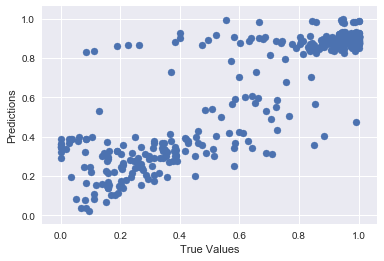

In [159]:
#plot the model

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [160]:
temp = pd.DataFrame({'x':predictions, 'y':y_test, 'z':X_test.shelter_TS})

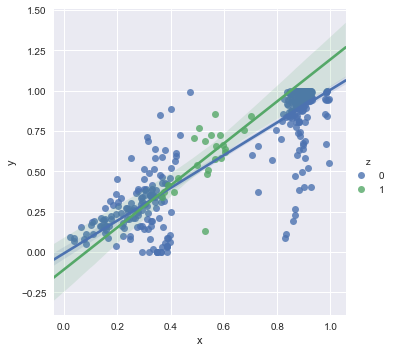

In [161]:
sns.lmplot(x='x', y='y', data=temp, hue = 'z')

In [162]:
#accuracy score

print 'Score:', model.score(X_test, y_test)

Score: 0.770890916821


In [163]:
#model describe

lm = linear_model.LinearRegression().fit(df_d2, y)

print 'MSE:', metrics.mean_squared_error(y, lm.predict(df_d2))
print 'R2: ', lm.score(df_d2, y)

MSE: 5.04106794047e-32
R2:  1.0


In [165]:
#model summary

print results.intercept_, results.coef_

AttributeError: 'OLSResults' object has no attribute 'intercept_'

In [166]:
#using statsmodel

X = df_d2.drop('Adoption_Rate', axis=1)
X = sm.add_constant(X) 

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption_Rate   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     520.8
Date:                Tue, 04 Jul 2017   Prob (F-statistic):               0.00
Time:                        22:40:48   Log-Likelihood:                 552.14
No. Observations:                1350   AIC:                            -1084.
Df Residuals:                    1340   BIC:                            -1032.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

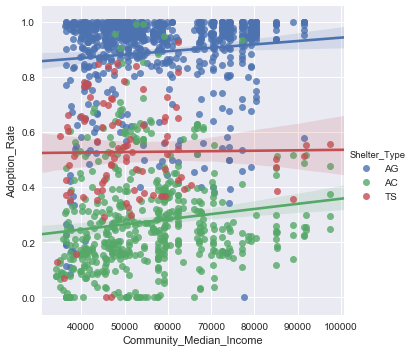

In [167]:
sns.lmplot(x='Community_Median_Income', y='Adoption_Rate', data=df, hue = 'Shelter_Type')

## Stratification by Shelter Type

Stratifiying the data set by Shelter Type to see if AG is responsible for masking effects of variables

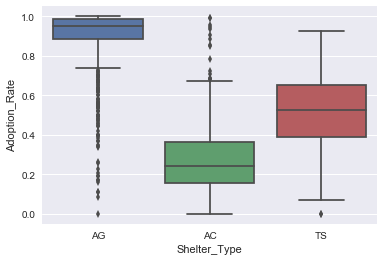

In [168]:
sns.boxplot(x='Shelter_Type', y='Adoption_Rate', data=df)

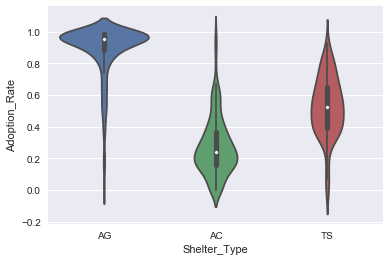

In [169]:
sns.violinplot(x='Shelter_Type', y='Adoption_Rate', data=df)

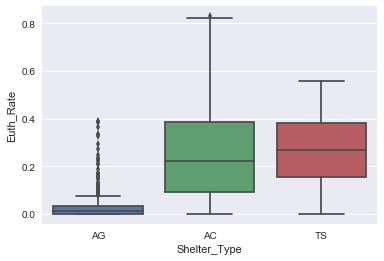

In [170]:
sns.boxplot(x='Shelter_Type', y='Euth_Rate', data=df)

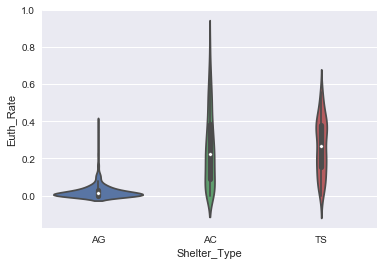

In [171]:
sns.violinplot(x='Shelter_Type', y='Euth_Rate', data=df)

### AG Shelters

In [172]:
df_ag = df[df.Shelter_Type == 'AG']
print df_ag.head()
print df_ag.count()

                Shelter_Name    Year Shelter_Type  Community_Name  \
0  A New Leash on Life, Inc.  2008.0           AG  Madison County   
1  A New Leash on Life, Inc.  2009.0           AG  Madison County   
2  A New Leash on Life, Inc.  2010.0           AG  Madison County   
3  A New Leash on Life, Inc.  2011.0           AG  Madison County   
4  A New Leash on Life, Inc.  2012.0           AG  Madison County   

  Community_State Community_Region  Community_Population  \
0              AL            South              319510.0   
1              AL            South              327744.0   
2              AL            South              335988.0   
3              AL            South              340111.0   
4              AL            South              343080.0   

   Community_Median_Income  Beginning_Shelter_Count  \
0                  55096.0                     46.0   
1                  57617.0                     54.0   
2                  53539.0                     55.0   
3   

In [173]:
df_ag.describe()

,Year,Community_Population,Community_Median_Income,Beginning_Shelter_Count,Subtotal_Intake_from_Public,Subtotal_from_Incoming_Transfers_from_Organizations_within_Community,Subtotal_Intake_from_Incoming_Transfers_from_Organizations_outside_Community,Subtotal_Intake_from_Owners_Guardians_Requesting_Euthanasia,Total_Intake,Total_Adoptions,TOTAL_OUTGOING_TRANSFERS_to _Organizations_within_Community,TOTAL_OUTGOING_TRANSFERS_to _Organizations_Outside_Community,Other_Return_to_Owner_Habitat_Died_Lost,Total_Euth,Total_Outcomes,Sum_Intake_Healthy,Sum_Intake_TR,Sum_Intake_TM,Sum_Intake_UU,Sum_Outgoing_Healthy,Sum_Outgoing_TR,Sum_Outgoing_TM,Sum_Outgoing_UU,Adoption_Rate,Euth_Rate,Total_Health_Intake,Percent_Healthy
count,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,2010.994631,1.165307e+06,57717.357047,53.386577,294.487248,207.948993,127.997315,11.503356,641.856376,543.248322,10.338255,12.711409,33.997315,37.865772,638.161074,411.877852,152.805369,42.561074,32.213423,378.530201,141.067114,41.636242,42.442953,0.890567,0.027478,639.457718,0.657337
std,1.962682,1.218370e+06,14240.827360,134.472829,859.317618,533.988772,391.792544,64.684327,1383.933605,1117.482811,41.139037,46.138160,236.874734,191.033348,1371.740704,919.875979,392.068808,136.672719,148.697730,812.796012,353.252104,133.019566,173.684154,0.164601,0.049971,1383.176477,0.279982
min,2008.000000,6.213400e+04,36157.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2009.000000,4.125770e+05,45775.000000,7.000000,14.000000,6.000000,0.000000,0.000000,71.000000,63.000000,0.000000,0.000000,0.000000,0.000000,71.000000,37.000000,5.000000,0.000000,0.000000,38.000000,1.000000,0.000000,0.000000,0.882759,0.000000,69.000000,0.487267
50%,2011.000000,8.524690e+05,54444.000000,23.000000,61.000000,41.000000,9.000000,0.000000,205.000000,166.000000,0.000000,0.000000,2.000000,2.000000,199.000000,113.000000,30.000000,5.000000,1.000000,113.000000,18.000000,3.000000,3.000000,0.951456,0.011628,204.000000,0.710926
75%,2013.000000,1.513952e+06,70706.000000,54.000000,239.000000,167.000000,70.000000,0.000000,480.000000,439.000000,2.000000,4.000000,9.000000,9.000000,478.000000,304.000000,119.000000,20.000000,7.000000,283.000000,106.000000,15.000000,12.000000,0.984127,0.031496,479.000000,0.886792
max,2014.000000,8.491079e+06,91425.000000,2109.000000,9674.000000,5440.000000,5090.000000,614.000000,13768.000000,12995.000000,575.000000,701.000000,2957.000000,3313.000000,13740.000000,8250.000000,5576.000000,1675.000000,1694.000000,8739.000000,3768.000000,1636.000000,2054.000000,1.000000,0.391753,13768.000000,1.000000


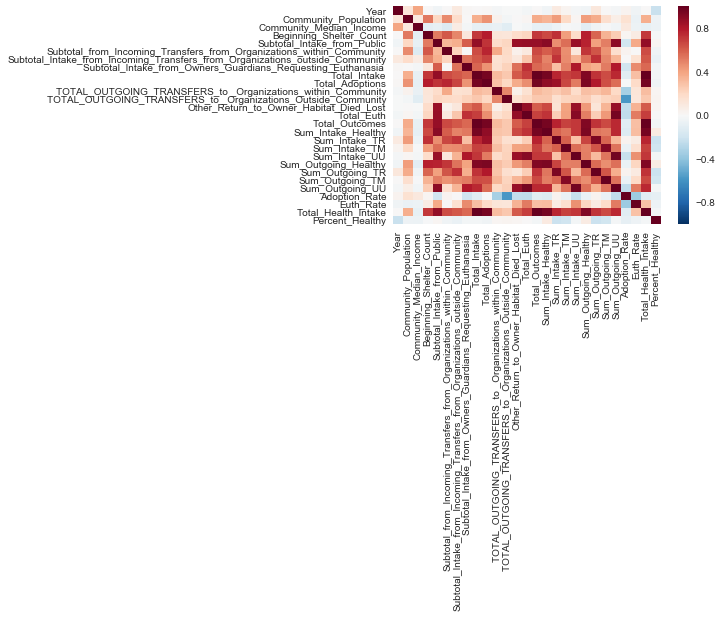

In [174]:
a = df_ag.corr()
sns.heatmap(a)

In [175]:
#new data frame

df_ag = df_ag[['Community_Population', 'Community_Median_Income', 'Percent_Healthy',
              'Adoption_Rate', 'Euth_Rate']]

df_ag = df_ag.join(dummy.iloc[:, 1: ])

In [176]:
print df_ag.head()

   Community_Population  Community_Median_Income  Percent_Healthy  \
0              319510.0                  55096.0         0.722846   
1              327744.0                  57617.0         0.840304   
2              335988.0                  53539.0         0.739316   
3              340111.0                  54444.0         0.863333   
4              343080.0                  56839.0         0.869732   

   Adoption_Rate  Euth_Rate  comm_reg_Northeast  comm_reg_South  comm_reg_West  
0       0.988506   0.011494                   0               1              0  
1       0.992366   0.007634                   0               1              0  
2       0.970464   0.004219                   0               1              0  
3       0.935374   0.017007                   0               1              0  
4       0.992780   0.003610                   0               1              0  


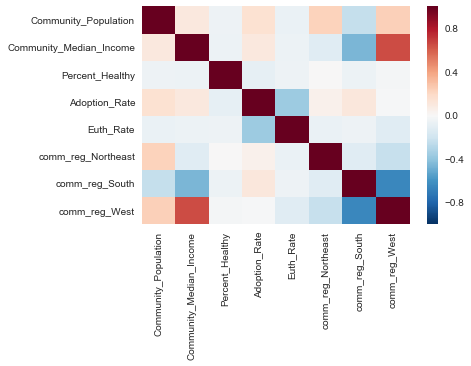

In [177]:
a = df_ag.corr()
sns.heatmap(a)

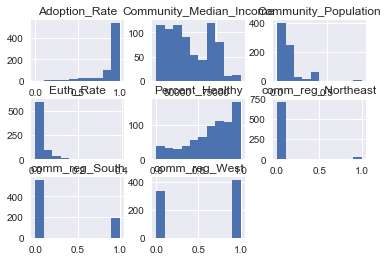

In [178]:
#plot the distribution of each variable
df_ag.hist()
pl.show()

0.95145631068


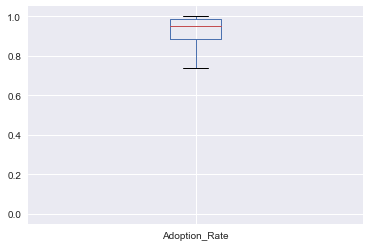

In [179]:
#create box plot for Adoption Rate
df_ag['Adoption_Rate'].plot(kind='box')

print df_ag['Adoption_Rate'].median()

0.0116279069767


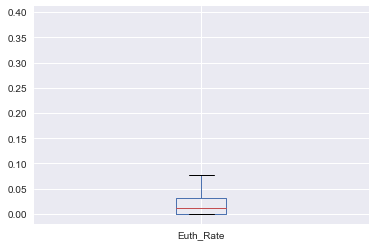

In [180]:
#create box plot for Euthanized Rate
df_ag['Euth_Rate'].plot(kind='box')

print df_ag['Euth_Rate'].median()

### Building the Model - AG

In [181]:
#from sklearn import linear_model

X = df_ag[['Percent_Healthy']]
y = df_ag['Adoption_Rate']

model = linear_model.LinearRegression()
results = model.fit(X, y)

print results.intercept_, results.coef_

0.925457378357 [-0.05307869]


In [182]:
#regression with health

X = df_ag[['Percent_Healthy']]
X = sm.add_constant(X) 
#y = df_ag['Adoption_Rate']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption_Rate   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.106
Date:                Tue, 04 Jul 2017   Prob (F-statistic):             0.0137
Time:                        22:51:39   Log-Likelihood:                 290.59
No. Observations:                 745   AIC:                            -577.2
Df Residuals:                     743   BIC:                            -568.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.9255      0.015     

In [183]:
#multilinear regression without region dummy variables

X = df_ag[['Percent_Healthy', 'Community_Population', 'Community_Median_Income']]
X = sm.add_constant(X)
#y = df_ag['Adoption_Rate']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption_Rate   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     9.729
Date:                Tue, 04 Jul 2017   Prob (F-statistic):           2.66e-06
Time:                        22:51:39   Log-Likelihood:                 301.93
No. Observations:                 745   AIC:                            -595.9
Df Residuals:                     741   BIC:                            -577.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [184]:
#multilinear regression with region dummy variables added

X = df_ag[['Percent_Healthy', 'Community_Population', 'Community_Median_Income', 
          'comm_reg_Northeast', 'comm_reg_South', 'comm_reg_West']]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption_Rate   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     11.85
Date:                Tue, 04 Jul 2017   Prob (F-statistic):           1.03e-12
Time:                        22:51:40   Log-Likelihood:                 321.80
No. Observations:                 745   AIC:                            -629.6
Df Residuals:                     738   BIC:                            -597.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### AC Shelters

In [185]:
df_ac = df[df.Shelter_Type == 'AC']
print df_ac.head()
print df_ac.count()

                      Shelter_Name    Year Shelter_Type     Community_Name  \
6      Adams County Animal Control  2008.0           AC  Metro Denver Area   
7      Adams County Animal Control  2009.0           AC  Metro Denver Area   
8      Adams County Animal Control  2010.0           AC  Metro Denver Area   
16  Alachua County Animal Services  2008.0           AC     Alachua County   
17  Alachua County Animal Services  2009.0           AC     Alachua County   

   Community_State Community_Region  Community_Population  \
6               CO             West             2690946.0   
7               CO             West             2231693.0   
8               CO             West             2728339.0   
16              FL            South              241364.0   
17              FL            South              243574.0   

    Community_Median_Income  Beginning_Shelter_Count  \
6                   62339.0                    168.0   
7                   59431.0                    140.0

In [186]:
df_ac.describe()

,Year,Community_Population,Community_Median_Income,Beginning_Shelter_Count,Subtotal_Intake_from_Public,Subtotal_from_Incoming_Transfers_from_Organizations_within_Community,Subtotal_Intake_from_Incoming_Transfers_from_Organizations_outside_Community,Subtotal_Intake_from_Owners_Guardians_Requesting_Euthanasia,Total_Intake,Total_Adoptions,TOTAL_OUTGOING_TRANSFERS_to _Organizations_within_Community,TOTAL_OUTGOING_TRANSFERS_to _Organizations_Outside_Community,Other_Return_to_Owner_Habitat_Died_Lost,Total_Euth,Total_Outcomes,Sum_Intake_Healthy,Sum_Intake_TR,Sum_Intake_TM,Sum_Intake_UU,Sum_Outgoing_Healthy,Sum_Outgoing_TR,Sum_Outgoing_TM,Sum_Outgoing_UU,Adoption_Rate,Euth_Rate,Total_Health_Intake,Percent_Healthy
count,512.000000,5.120000e+02,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,2010.572266,9.862099e+05,55224.072266,92.730469,3403.365234,44.726562,30.720703,115.353516,3594.369141,872.468750,349.662109,279.064453,750.923828,1330.939453,3583.058594,2025.957031,520.949219,313.828125,696.984375,1313.207031,446.505859,297.554688,758.808594,0.274678,0.255049,3557.718750,0.640425
std,2.018179,1.191742e+06,13602.515875,151.870534,6235.005503,260.688452,115.306883,432.138371,6427.402844,1733.974498,743.479113,646.587533,1371.855358,2941.983244,6411.878198,3479.527843,1302.096059,886.117421,1998.054183,2393.805699,1063.058778,820.528507,1845.963464,0.184042,0.199152,6434.972391,0.249348
min,2008.000000,2.474100e+04,34119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000
25%,2009.000000,2.191930e+05,45383.000000,15.000000,415.500000,0.000000,0.000000,0.000000,449.000000,117.750000,2.750000,1.000000,147.750000,55.000000,455.000000,275.500000,16.750000,4.750000,29.750000,163.000000,12.000000,5.750000,30.750000,0.157708,0.092170,433.750000,0.481673
50%,2010.000000,5.348425e+05,52940.500000,47.500000,1474.500000,0.000000,0.000000,8.000000,1681.500000,386.000000,72.500000,55.500000,374.500000,387.000000,1683.000000,1026.500000,126.500000,57.000000,155.500000,517.500000,96.500000,53.500000,195.500000,0.240329,0.221731,1622.500000,0.684709
75%,2012.000000,1.529875e+06,62308.000000,106.000000,3166.250000,5.000000,3.000000,82.250000,3416.000000,840.500000,276.750000,243.500000,904.250000,1208.500000,3429.750000,2258.250000,478.250000,205.750000,467.750000,1296.000000,334.250000,178.500000,666.000000,0.363975,0.384572,3384.750000,0.824025
max,2014.000000,8.491079e+06,97532.000000,1049.000000,43920.000000,4301.000000,1507.000000,6746.000000,43927.000000,11892.000000,6181.000000,5400.000000,15206.000000,22499.000000,43927.000000,30617.000000,11723.000000,7787.000000,17307.000000,17724.000000,11027.000000,7609.000000,16144.000000,0.993151,0.830189,43927.000000,1.000000


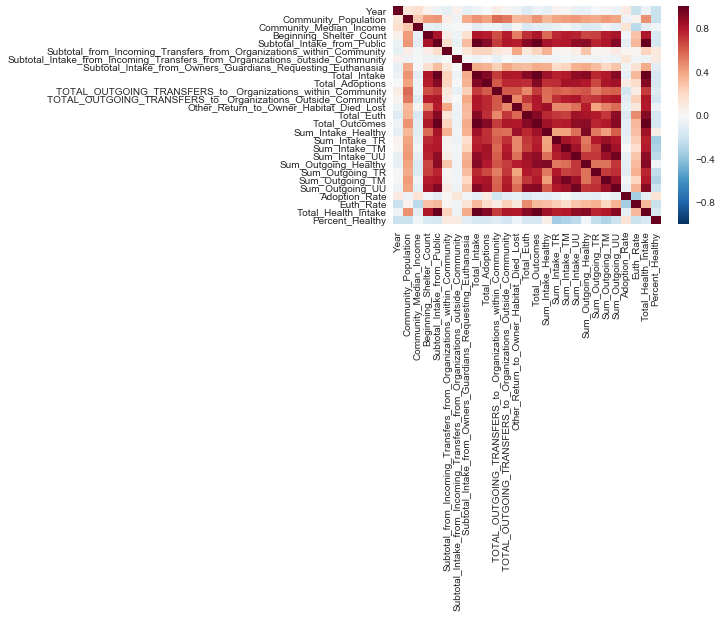

In [187]:
b = df_ac.corr()
sns.heatmap(b)

In [188]:
#new data frame

df_ac = df_ac[['Community_Population', 'Community_Median_Income', 'Percent_Healthy',
              'Adoption_Rate', 'Euth_Rate']]

df_ac = df_ac.join(dummy.iloc[:, 1: ])

In [189]:
print df_ac.head()

    Community_Population  Community_Median_Income  Percent_Healthy  \
6              2690946.0                  62339.0         0.720876   
7              2231693.0                  59431.0         0.760220   
8              2728339.0                  59792.0         0.734474   
16              241364.0                  43098.0         0.682740   
17              243574.0                  38019.0         0.651576   

    Adoption_Rate  Euth_Rate  comm_reg_Northeast  comm_reg_South  \
6        0.354511   0.174935                   0               0   
7        0.400175   0.172212                   0               0   
8        0.375407   0.158100                   0               0   
16       0.151337   0.384759                   0               1   
17       0.138072   0.340578                   0               1   

    comm_reg_West  
6               1  
7               1  
8               1  
16              0  
17              0  


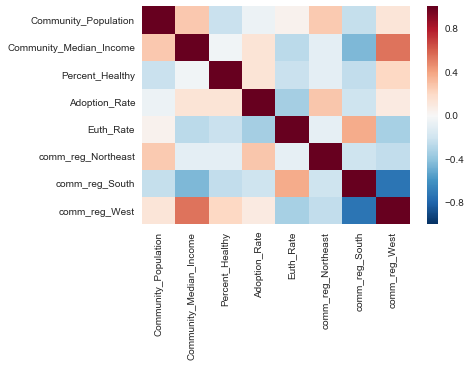

In [190]:
g = df_ac.corr()
sns.heatmap(g)

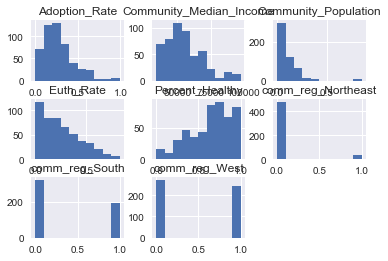

In [191]:
#plot the distribution of each variable
df_ac.hist()
pl.show()

0.240328948612


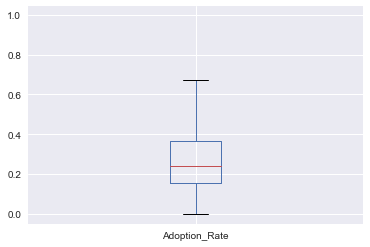

In [192]:
#create box plot for Adoption Rate
df_ac['Adoption_Rate'].plot(kind='box')

print df_ac['Adoption_Rate'].median()

0.221731090435


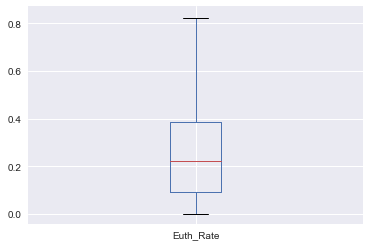

In [193]:
#create box plot for Euthanized Rate
df_ac['Euth_Rate'].plot(kind='box')

print df_ac['Euth_Rate'].median()

### Building the Model - AC

In [194]:
#from sklearn import linear_model

X = df_ac[['Percent_Healthy']]
y = df_ac['Adoption_Rate']

model = linear_model.LinearRegression()
results = model.fit(X, y)

print results.intercept_, results.coef_

0.210225621806 [ 0.10064006]


In [195]:
#regression with health

X = df_ac[['Percent_Healthy']]
X = sm.add_constant(X) 

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption_Rate   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     9.661
Date:                Tue, 04 Jul 2017   Prob (F-statistic):            0.00199
Time:                        22:51:55   Log-Likelihood:                 145.41
No. Observations:                 512   AIC:                            -286.8
Df Residuals:                     510   BIC:                            -278.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2102      0.022     

In [196]:
#multilinear regression without region dummy variables

X = df_ac[['Percent_Healthy', 'Community_Population', 'Community_Median_Income']]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption_Rate   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     7.841
Date:                Tue, 04 Jul 2017   Prob (F-statistic):           4.00e-05
Time:                        22:51:59   Log-Likelihood:                 152.20
No. Observations:                 512   AIC:                            -296.4
Df Residuals:                     508   BIC:                            -279.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [197]:
#multilinear regression with region dummy variables added

X = df_ac[['Percent_Healthy', 'Community_Population', 'Community_Median_Income', 
          'comm_reg_Northeast', 'comm_reg_South', 'comm_reg_West']]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption_Rate   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     16.87
Date:                Tue, 04 Jul 2017   Prob (F-statistic):           8.71e-18
Time:                        22:52:00   Log-Likelihood:                 187.37
No. Observations:                 512   AIC:                            -360.7
Df Residuals:                     505   BIC:                            -331.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### TS Shelters

In [198]:
df_ts = df[df.Shelter_Type == 'TS']
print df_ts.head()
print df_ts.count()

                 Shelter_Name    Year Shelter_Type     Community_Name  \
84   Animal Humane New Mexico  2010.0           TS  Bernalillo County   
85   Animal Humane New Mexico  2011.0           TS  Bernalillo County   
86   Animal Humane New Mexico  2012.0           TS  Bernalillo County   
87   Animal Humane New Mexico  2013.0           TS  Bernalillo County   
113     Animal Welfare League  2008.0           TS     Chicago (City)   

    Community_State Community_Region  Community_Population  \
84               NM             West              664639.0   
85               NM             West              670968.0   
86               NM             West              673460.0   
87               NM             West              674221.0   
113              IL          Midwest             2833321.0   

     Community_Median_Income  Beginning_Shelter_Count  \
84                   47624.0                    125.0   
85                   43916.0                    128.0   
86               

In [199]:
df_ts.describe()

,Year,Community_Population,Community_Median_Income,Beginning_Shelter_Count,Subtotal_Intake_from_Public,Subtotal_from_Incoming_Transfers_from_Organizations_within_Community,Subtotal_Intake_from_Incoming_Transfers_from_Organizations_outside_Community,Subtotal_Intake_from_Owners_Guardians_Requesting_Euthanasia,Total_Intake,Total_Adoptions,TOTAL_OUTGOING_TRANSFERS_to _Organizations_within_Community,TOTAL_OUTGOING_TRANSFERS_to _Organizations_Outside_Community,Other_Return_to_Owner_Habitat_Died_Lost,Total_Euth,Total_Outcomes,Sum_Intake_Healthy,Sum_Intake_TR,Sum_Intake_TM,Sum_Intake_UU,Sum_Outgoing_Healthy,Sum_Outgoing_TR,Sum_Outgoing_TM,Sum_Outgoing_UU,Adoption_Rate,Euth_Rate,Total_Health_Intake,Percent_Healthy
count,93.000000,9.300000e+01,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,2010.215054,1.390981e+06,51688.075269,163.623656,2992.548387,292.150538,505.580645,590.978495,4381.258065,2083.505376,105.419355,237.311828,440.139785,1512.548387,4378.924731,2381.000000,549.967742,330.408602,1119.881720,1722.387097,530.698925,367.150538,1318.795699,0.527614,0.265507,4381.258065,0.613711
std,1.875758,1.142211e+06,13443.934666,253.666201,3653.003352,370.798139,797.569573,754.502197,4488.558876,1859.522704,180.396322,396.928341,538.920834,2226.389198,4418.131531,2006.489434,648.694734,648.187225,1932.290496,1421.637704,583.593754,671.958105,2158.893318,0.187616,0.148197,4488.558876,0.210565
min,2008.000000,6.342400e+04,34400.000000,0.000000,11.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,26.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,0.000000,0.000000,71.000000,0.007596
25%,2009.000000,4.721470e+05,43628.000000,64.000000,929.000000,39.000000,21.000000,67.000000,1964.000000,964.000000,3.000000,11.000000,63.000000,327.000000,1974.000000,738.000000,94.000000,28.000000,166.000000,518.000000,103.000000,27.000000,245.000000,0.391163,0.155702,1964.000000,0.461718
50%,2010.000000,9.186520e+05,48395.000000,89.000000,1728.000000,163.000000,224.000000,317.000000,3104.000000,1590.000000,24.000000,72.000000,208.000000,754.000000,3098.000000,1969.000000,318.000000,165.000000,429.000000,1497.000000,333.000000,175.000000,591.000000,0.525619,0.267905,3104.000000,0.666667
75%,2012.000000,2.231693e+06,59055.000000,139.000000,2766.000000,394.000000,579.000000,880.000000,4702.000000,2568.000000,146.000000,305.000000,690.000000,1347.000000,4727.000000,3382.000000,843.000000,344.000000,966.000000,2280.000000,802.000000,397.000000,1262.000000,0.651406,0.380803,4702.000000,0.780564
max,2014.000000,4.087191e+06,97532.000000,1745.000000,14641.000000,1985.000000,4322.000000,2945.000000,17730.000000,8394.000000,1214.000000,2969.000000,2451.000000,9694.000000,17699.000000,8244.000000,3106.000000,4168.000000,8297.000000,5445.000000,2973.000000,3991.000000,9682.000000,0.927103,0.560088,17730.000000,0.940711


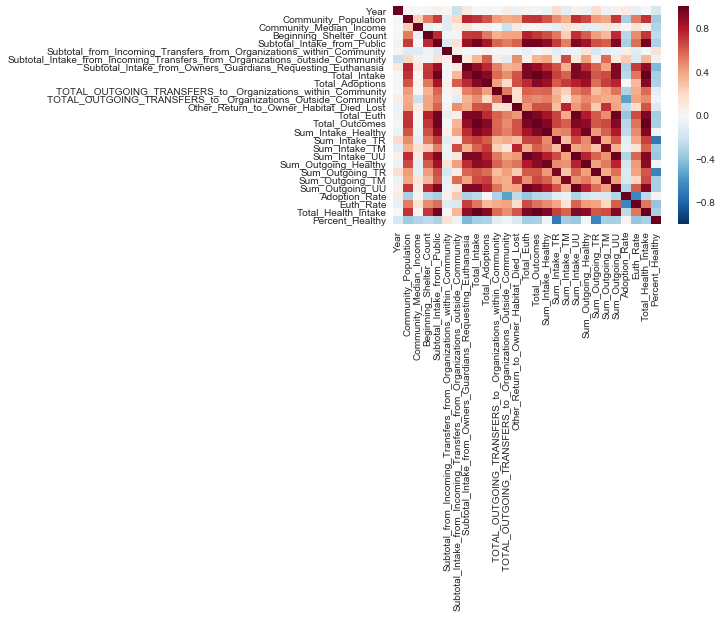

In [200]:
t = df_ts.corr()
sns.heatmap(t)

In [201]:
#new data frame

df_ts = df_ts[['Community_Population', 'Community_Median_Income', 'Percent_Healthy',
              'Adoption_Rate', 'Euth_Rate']]

df_ts = df_ts.join(dummy.iloc[:, 1: ])

In [202]:
print df_ts.head()

     Community_Population  Community_Median_Income  Percent_Healthy  \
84               664639.0                  47624.0         0.746888   
85               670968.0                  43916.0         0.801605   
86               673460.0                  46190.0         0.836269   
87               674221.0                  48257.0         0.786590   
113             2833321.0                  46911.0         0.912905   

     Adoption_Rate  Euth_Rate  comm_reg_Northeast  comm_reg_South  \
84        0.821053   0.089474                   0               0   
85        0.846525   0.078185                   0               0   
86        0.839199   0.080400                   0               0   
87        0.852130   0.080917                   0               0   
113       0.000000   0.478712                   0               0   

     comm_reg_West  
84               1  
85               1  
86               1  
87               1  
113              0  


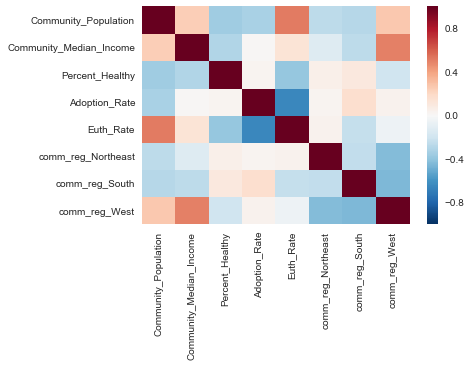

In [203]:
t = df_ts.corr()
sns.heatmap(t)

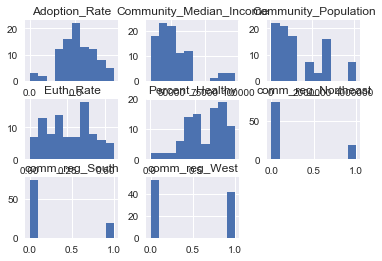

In [204]:
#plot the distribution of each variable
df_ts.hist()
pl.show()

0.525618883132


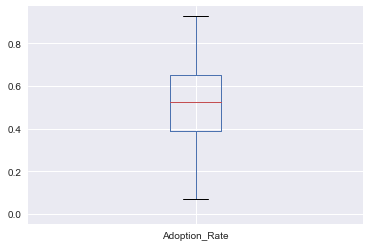

In [205]:
#create box plot for Adoption Rate
df_ts['Adoption_Rate'].plot(kind='box')

print df_ts['Adoption_Rate'].median()

0.267905205803


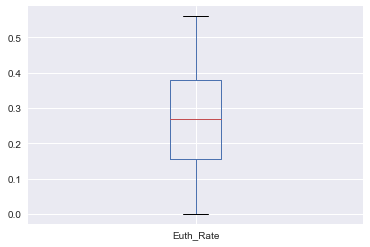

In [206]:
#create box plot for Euthanized Rate
df_ts['Euth_Rate'].plot(kind='box')

print df_ts['Euth_Rate'].median()

### Building the Model - TS

In [207]:
#from sklearn import linear_model

X = df_ts[['Percent_Healthy']]
y = df_ts['Adoption_Rate']

model = linear_model.LinearRegression()
results = model.fit(X, y)

print results.intercept_, results.coef_

0.511107491944 [ 0.02689608]


In [208]:
#regression with health

X = df_ts[['Percent_Healthy']]
X = sm.add_constant(X) 

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption_Rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.08299
Date:                Tue, 04 Jul 2017   Prob (F-statistic):              0.774
Time:                        22:52:09   Log-Likelihood:                 24.206
No. Observations:                  93   AIC:                            -44.41
Df Residuals:                      91   BIC:                            -39.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5111      0.061     

In [209]:
#multilinear regression without region dummy variables

X = df_ts[['Percent_Healthy', 'Community_Population', 'Community_Median_Income']]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption_Rate   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     3.897
Date:                Tue, 04 Jul 2017   Prob (F-statistic):             0.0115
Time:                        22:52:10   Log-Likelihood:                 29.903
No. Observations:                  93   AIC:                            -51.81
Df Residuals:                      89   BIC:                            -41.68
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [210]:
#multilinear regression with region dummy variables added

X = df_ts[['Percent_Healthy', 'Community_Population', 'Community_Median_Income', 
          'comm_reg_Northeast', 'comm_reg_South', 'comm_reg_West']]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption_Rate   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     2.631
Date:                Tue, 04 Jul 2017   Prob (F-statistic):             0.0217
Time:                        22:52:10   Log-Likelihood:                 32.000
No. Observations:                  93   AIC:                            -50.00
Df Residuals:                      86   BIC:                            -32.27
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Visualizations

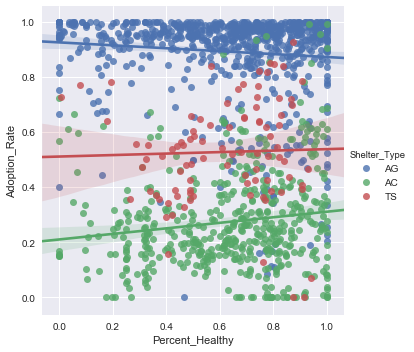

In [211]:
sns.lmplot(x='Percent_Healthy', y='Adoption_Rate', data=df, hue = 'Shelter_Type')

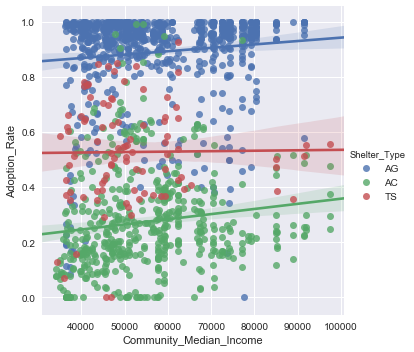

In [212]:
sns.lmplot(x='Community_Median_Income', y='Adoption_Rate', data=df, hue = 'Shelter_Type')

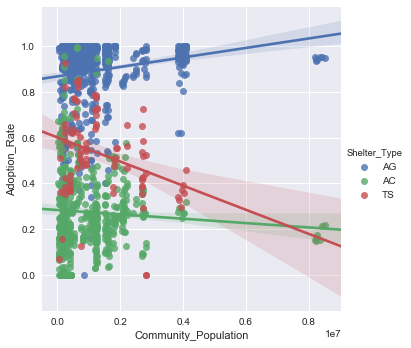

In [22]:
sns.lmplot(x='Community_Population', y='Adoption_Rate', data=df, hue = 'Shelter_Type')

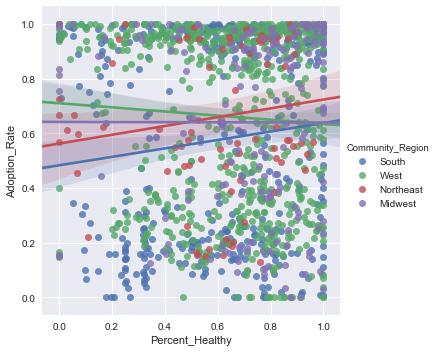

In [214]:
sns.lmplot(x='Percent_Healthy', y='Adoption_Rate', data=df, hue = 'Community_Region')

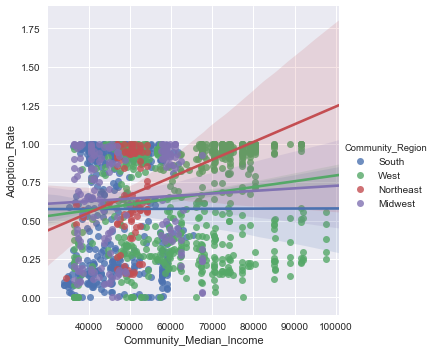

In [213]:
sns.lmplot(x='Community_Median_Income', y='Adoption_Rate', data=df, hue = 'Community_Region')

## New Model

In [121]:
import statsmodels.formula.api as smf # formula: response ~ predictor + predictor

df_d3 = df[['Community_Population', 'Community_Median_Income', 'Percent_Healthy',
              'Adoption_Rate', 'Euth_Rate', 'Shelter_Type', 'Community_Region']]

est = smf.ols(formula='Adoption_Rate ~ C(Shelter_Type) * C(Community_Region) * (Community_Median_Income + Percent_Healthy + Community_Population)', data=df_d3)

results = est.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Adoption_Rate   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     104.9
Date:                Tue, 04 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:17:18   Log-Likelihood:                 594.28
No. Observations:                1350   AIC:                            -1093.
Df Residuals:                    1302   BIC:                            -842.6
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                          0.0253      0.132      0.192      0.848      -0.233       0.284
C(Shelter_Type)[T.AG]                                                              0.6057      0.155      3.901      0.000       0.301       0.910
C(Shelter_Type)[T.TS]                                                             -0.5067      1.179     -0.430      0.667      -2.819       1.806
C(Community_Region)[T.Northeast]                                                  -0.5155      0.404     -1.277      0.202      -1.308       0.276
C(Community_Region)[T.South]                                                      -0.1302      0.156     -0.837      0.403      -0.435       0.175
C(Community_Region)[T.West]                                                        0.0709      0.149      0.475      0.635      -0.222       0.364
C(Shelter_Type)[T.AG]:C(Community_Region)[T.Northeast]                             1.3830      0.763      1.814      0.070      -0.113       2.879
C(Shelter_Type)[T.TS]:C(Community_Region)[T.Northeast]                             1.9016      1.360      1.398      0.162      -0.767       4.571
C(Shelter_Type)[T.AG]:C(Community_Region)[T.South]                                 0.4377      0.196      2.236      0.026       0.054       0.822
C(Shelter_Type)[T.TS]:C(Community_Region)[T.South]                                 1.1553      1.199      0.964      0.335      -1.196       3.507
C(Shelter_Type)[T.AG]:C(Community_Region)[T.West]                                 -0.0242      0.178     -0.136      0.892      -0.374       0.326
C(Shelter_Type)[T.TS]:C(Community_Region)[T.West]                                 -0.0186      1.208     -0.015      0.988      -2.388       2.351
Community_Median_Income                                                         4.548e-06   2.35e-06      1.932      0.054   -6.99e-08    9.17e-06
C(Shelter_Type)[T.AG]:Community_Median_Income                                  -7.876e-07   2.86e-06     -0.275      0.783   -6.41e-06    4.83e-06
C(Shelter_Type)[T.TS]:Community_Median_Income                                   2.269e-05   2.94e-05      0.771      0.441   -3.51e-05    8.04e-05
C(Community_Region)[T.Northeast]:Community_Median_Income                        1.588e-05   7.75e-06      2.050      0.041    6.83e-07    3.11e-05
C(Community_Region)[T.South]:Community_Median_Income                            9.957e-07   2.85e-06      0.349      0.727   -4.61e-06     6.6e-06
C(Community_Region)[T.West]:Community_Median_Income                             -3.75e-06   2.47e-06     -1.516      0.130    -8.6e-06     1.1e

## Conclusion

Even with segmentation showing us a drastic difference in Adoption and Euthanization Rates between shelter types, there is no one particular factor that contributes to a higher liklihood of adoption.  I was able to determine that a combination of factors lead to higher adoption rates.  For example, a particular mixture of a healthy population of dogs coupled with a community with higher median incomes lead to more adoptions.

What would be great to see is more detailed tracking from the shelters on the pet level, not just summations at the shelter level for the entire year - being able to see the path of a particular dog at intake and following it until the outcome would give us a better idea of how factors contribute to adoption.